In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

In [20]:
df= pd.read_csv('/Users/viplovmadan/Downloads/tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
### 1. Make a list of categorical and numerical columns in the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [36]:
### 2. Compute the average bill amount for each day.

df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

In [39]:
### 3. Which gender is more generous in giving tips?
df.groupby('sex')['tip'].sum() #male give more tips

sex
Female    246.51
Male      485.07
Name: tip, dtype: float64

In [48]:
### 4. According to the data, were there more customers for dinner or lunch?

df.groupby('time')['size'].sum()

time
Dinner    463
Lunch     164
Name: size, dtype: int64

In [50]:
### 5. Based on the statistical summary, comment on the variable 'tip'
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [55]:
### 6. Find the busiest day in terms of the orders?
df.day.mode()

0    Sat
dtype: object

/Users/viplovmadan/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

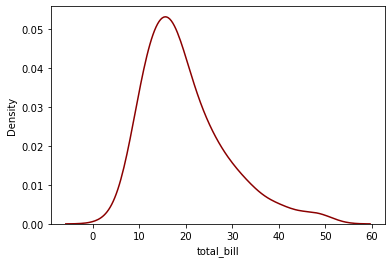

In [56]:
### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

sns.distplot(df['total_bill'], hist=False, color='darkred')

<AxesSubplot:>

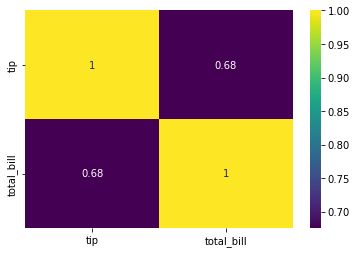

In [58]:
### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

sns.heatmap(df[['tip','total_bill']].corr(), annot=True,cmap='viridis')

([<matplotlib.patches.Wedge at 0x7f8e2cfbd700>,
 [Text(-0.7186413537277575, 1.485279301920126, 'Male'),
  Text(0.7186413537277566, -1.4852793019201262, 'Female')],
 [Text(-0.3919861929424131, 0.8101523465018867, '64.3%'),
  Text(0.39198619294241266, -0.8101523465018869, '35.7%')])

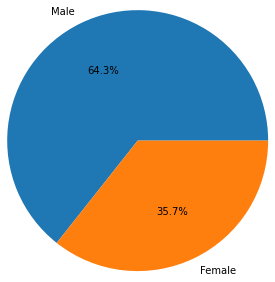

In [73]:
### 9. What is the percentage of males and females in the dataset? and display it in the plot
plt.pie(df.sex.value_counts(), autopct='%.1f%%',radius=1.5, labels=['Male', 'Female'])

<BarContainer object of 2 artists>

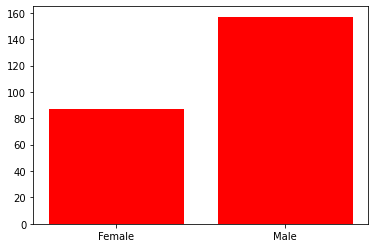

In [78]:
### 10. Compute the gender-wise count based on smoking habits and display it in the plot
freq= df.groupby('sex')['smoker'].count()
plt.bar(freq.index, freq.values, color='red')

Text(0, 0.5, 'avg tip')

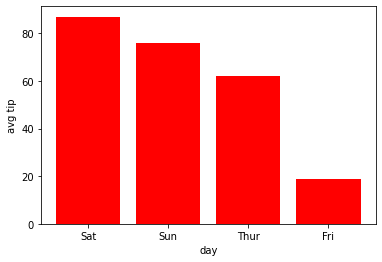

In [81]:
### 11. Compute the average tip amount given for different days and display it in the plot
avg=df.day.value_counts()
plt.bar(avg.index, avg.values, color='red')
plt.xlabel('day')
plt.ylabel('avg tip')

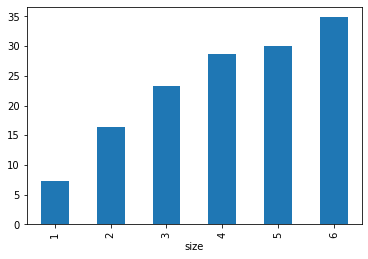

In [84]:
### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

df.groupby('size')['total_bill'].mean().plot(kind='bar')
plt.show()

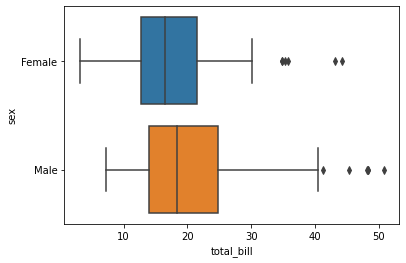

In [5]:
### 13. Plot a horizontal boxplot to compare the bill amount based on gender
sns.boxplot(x='total_bill', y='sex', data=df);
plt.show()

In [30]:
### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday
df_Filtered = df[df['day'].apply(lambda x:x in ('Sat', 'Sun'))]
df_Filtered.groupby(['time', 'day'])['total_bill'].max()

time    day
Dinner  Sat    50.81
        Sun    48.17
Name: total_bill, dtype: float64

In [35]:
 ### 15. Compute the percentage of missing values in the dataset.
df.isna().sum()/len(df)*100

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

In [50]:
### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.
len(df[df.duplicated()])
df.drop_duplicates()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


/Users/viplovmadan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/viplovmadan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


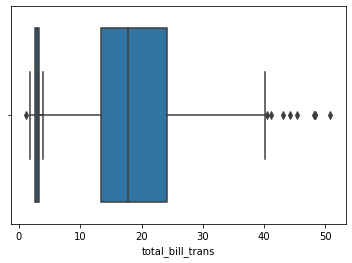

In [53]:
### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

sns.boxplot(df['total_bill'])
##treating outliers with log transformation
df['total_bill_trans']= np.log(df['total_bill'])

sns.boxplot(df['total_bill_trans'])
plt.show()

/Users/viplovmadan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


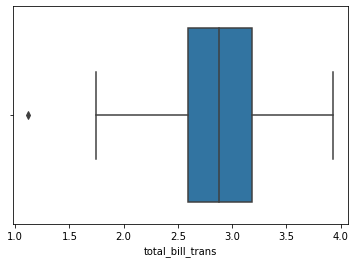

In [54]:
sns.boxplot(df['total_bill_trans'])
plt.show()

/Users/viplovmadan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip'>

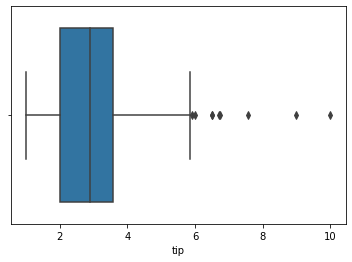

In [56]:
### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.
sns.boxplot(df['tip'])

In [57]:
##using IQR 
Q1= df['tip'].quantile(0.25)
Q3= df['tip'].quantile(0.75)
IQR=Q3-Q1
lower_whisker= Q1-(1.5*IQR)
upper_whisker=Q3+(1.5*IQR)

/Users/viplovmadan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


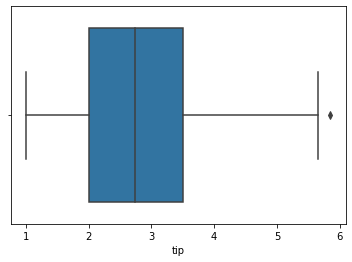

In [58]:
df_out=df.loc[(df['tip']<upper_whisker) & (df['tip']>lower_whisker)]

sns.boxplot(df_out['tip'])
plt.show()

In [59]:
### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

df= pd.get_dummies(df, drop_first=True)
df.sample(5)

,total_bill,tip,size,total_bill_trans,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
27,12.69,2.0,2,2.540814,1,0,1,0,0,0
187,30.46,2.0,5,3.416414,1,1,0,1,0,0
81,16.66,3.4,2,2.813011,1,0,0,0,1,1
86,13.03,2.0,2,2.567254,1,0,0,0,1,1
183,23.17,6.5,4,3.142858,1,1,0,1,0,0


In [69]:
### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.
tb_max=df['total_bill'].max()
tb_min=df['total_bill'].min()
range1= tb_max-tb_min
print(range1)

nm= MinMaxScaler()

df['total_bill_nm']= nm.fit_transform(df[['total_bill']])

tb_nm_max= df['total_bill_nm'].max()
tb_nm_min= df['total_bill_nm'].min()
range2=tb_nm_max-tb_nm_min
print(range2)

47.74
0.9999999999999999


In [101]:
### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
# i) Encode the categorical variables.
# ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

tips_df= pd.read_csv('/Users/viplovmadan/Downloads/tips.csv')

tips_df=pd.get_dummies(tips_df, drop_first=True)

X=tips_df.drop(['tip'], axis=1)
Y= tips_df['tip']

print(Y)




0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64


In [102]:
### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

trainX, testX, trainY, TestY = train_test_split(X,Y, test_size=.30)





In [105]:
nm1=MinMaxScaler()

trainX['total_bill_trans']= nm1.fit_transform(trainX[['total_bill']])
trainX['size_trans']= nm1.fit_transform(trainX[['size']])
testX['total_bill_trans']= nm1.fit_transform(testX[['total_bill']])
testX['size_trans']= nm1.fit_transform(testX[['size']])

testX

/var/folders/lp/7f_1_1vn05l5xr8j5nf2bsc80000gn/T/ipykernel_1989/139810535.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX['total_bill_trans']= nm1.fit_transform(trainX[['total_bill']])
/var/folders/lp/7f_1_1vn05l5xr8j5nf2bsc80000gn/T/ipykernel_1989/139810535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainX['size_trans']= nm1.fit_transform(trainX[['size']])
/var/folders/lp/7f_1_1vn05l5xr8j5nf2bsc80000gn/T/ipykernel_1989/139810535.py:5: SettingWithCopyWarning: 
A value is trying to be set

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch,total_bill_trans,size_trans
211,25.89,4,1,1,1,0,0,0,0.446960,0.50
170,50.81,3,1,1,1,0,0,0,1.000000,0.25
126,8.52,2,1,0,0,0,1,1,0.061474,0.00
236,12.60,2,1,1,1,0,0,0,0.152020,0.00
46,22.23,2,1,0,0,1,0,0,0.365735,0.00
...,...,...,...,...,...,...,...,...,...,...
62,11.02,2,1,1,1,0,0,0,0.116955,0.00
4,24.59,4,0,0,0,1,0,0,0.418109,0.50
105,15.36,2,1,1,1,0,0,0,0.213271,0.00
21,20.29,2,0,0,1,0,0,0,0.322681,0.00


In [110]:
### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

linearRegression= LinearRegression()

linearRegression.fit(trainX,trainY)

LinearRegression()

In [112]:
y_pred=linearRegression.predict(testX)

mean_squared_error(TestY,y_pred)

1.4806704513114157